## OR-tools example

This notebook uses `optiwindnet` to route the collector system cables via OR-tools solver.

In [12]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, ModelOptions, load_repository

In [13]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [14]:
ModelOptions.help()

topology in {"radial", "branched", "branched"} default: branched
    Set the topology of subtrees in the solution.

feeder_route in {"straight", "segmented", "segmented"} default: segmented
    If feeder routes must be "straight" or can be detoured ("segmented").

feeder_limit in {"unlimited", "specified", "minimum", "min_plus1", "min_plus2", "min_plus3", "unlimited"} default: unlimited
    Whether to limit the maximum number of feeders, if set to "specified", additional kwarg "max_feeders" must be given.

balanced [bool] default: False
    Whether to enforce balanced subtrees (subtree loads differ at most by one unit).

max_feeders [int] default: 0
    Maximum number of feeders (used only if <feeder_limit = "specified">)



### Initialize Moray East

>In this example, the `load_repository()` functionality is used to load a prebuilt *Networkx.Graph*. For more details on this functionality look into the notebook about [Load repositories containing location data](api_02-load-repositories.ipynb).

In [15]:
locations = load_repository()
wfn = WindFarmNetwork(L=locations.morayeast, cables=7)

<Axes: >

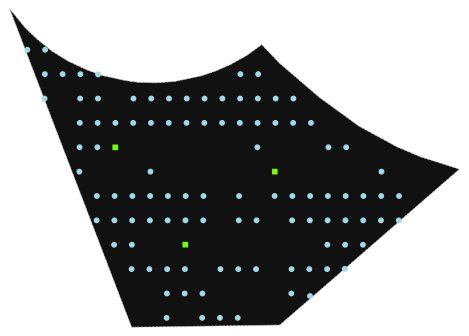

In [16]:
wfn.plot_location()

<Axes: >

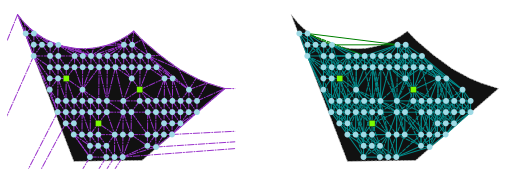

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(9, 3))
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)

### Optimize Moray East

Initial heuristic solution to warm-start the solver:

In [18]:
model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )
router_warmstart = Heuristic(solver='Esau_Williams', model_options=model_options) #
res_warmstart= wfn.optimize() # default is Heuristic Esau_Williams


<Axes: >

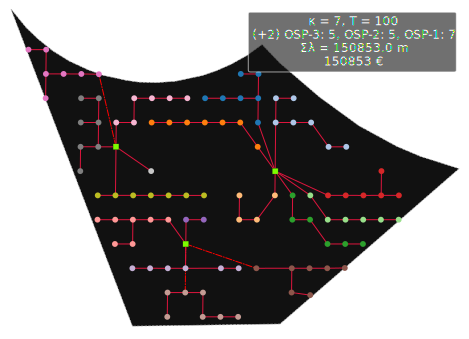

In [19]:
wfn.plot_selected_links()

<Axes: >

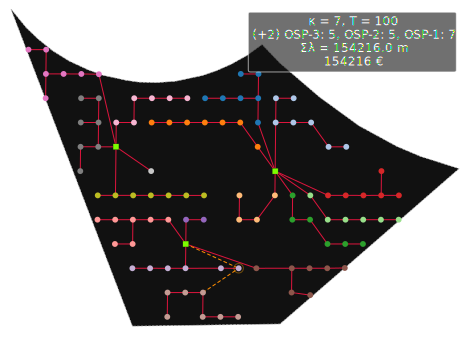

In [20]:
wfn.plot()

In [21]:
solver_options=dict(
    num_workers = 8,
)

model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )

router = MILP(solver_name='ortools', time_limit=15, mip_gap=0.01, solver_options=solver_options,  verbose=True)
res = wfn.optimize(router=router)

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


<Axes: >

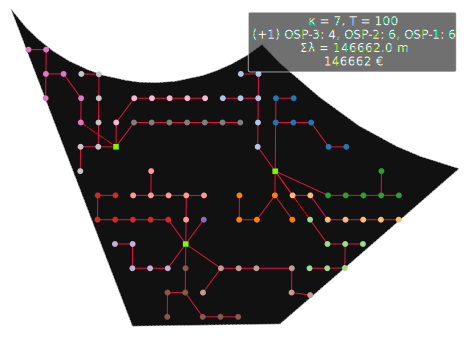

In [22]:
wfn.plot_selected_links()

<Axes: >

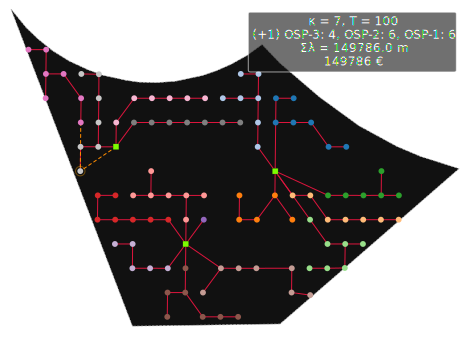

In [23]:
wfn.plot()